In [51]:
import pandas as pd

# 1. Datos a usar

In [52]:
# cargar datos desde csv
df_boston = pd.read_csv('Boston House Prices.csv')
df_boston

Rooms  Distance  Value
0    6.575    4.0900   24.0
1    6.421    4.9671   21.6
2    7.185    4.9671   34.7
3    6.998    6.0622   33.4
4    7.147    6.0622   36.2
..     ...       ...    ...
501  6.593    2.4786   22.4
502  6.120    2.2875   20.6
503  6.976    2.1675   23.9
504  6.794    2.3889   22.0
505  6.030    2.5050   11.9

[506 rows x 3 columns]

In [53]:
# descripción de los datos
df_boston.describe()

Rooms    Distance       Value
count  506.000000  506.000000  506.000000
mean     6.284634    3.795043   22.532806
std      0.702617    2.105710    9.197104
min      3.561000    1.129600    5.000000
25%      5.885500    2.100175   17.025000
50%      6.208500    3.207450   21.200000
75%      6.623500    5.188425   25.000000
max      8.780000   12.126500   50.000000

# 2. Regresión Lineal con Statsmodels

In [54]:
# se importa la librería statsmodel que ayuda a conducir testeos estadísticos y estimar modelos
# brinda una gran cantidad de métricas para cada estimador
import statsmodels.api as sm

## 2.1 Regresión Lineal simple

### 2.1.1 Definir las variables dependientes e independientes

In [38]:
# definición de la variable independiente
X = df_boston['Rooms']

# definición de la variable dependiente
y = df_boston['Value']


### 2.1.2 Explorar el dataset

<Axes: xlabel='Rooms', ylabel='Value'>

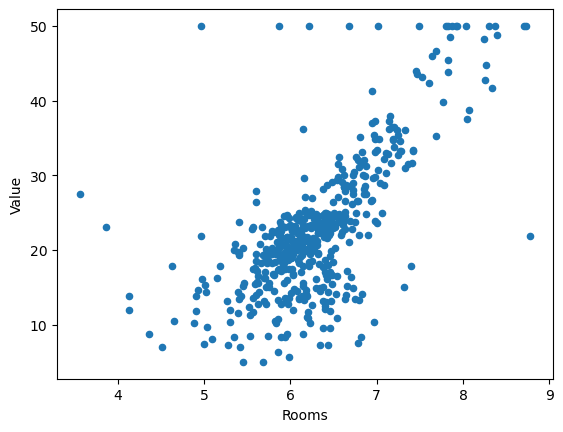

In [55]:
# usar gráfico de dispersión (scatter) con el método plot de pandas
df_boston.plot(kind='scatter', x='Rooms', y='Value')

### 2.1.3 Crear la regresión: Agregar constante y ajustar modelo

In [40]:
# agregamos la constante x (número de cuartos, variable independiente)
X = sm.add_constant(X) 

# modelo linear ajustado
linear_m = sm.OLS(y, X).fit() 

In [56]:
# una vez tenemos la constante y el modelo linear ajustado podemos predecir datos

# predecir los valores de la casas basados en el número de cuartos
linear_m.predict()

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

### 1.1.4 Tabla de Regresión

Brinda una extensiva lista de resultado que ayuda para ver qué tan bueno o malo es nuestro modelo

In [57]:
# con el método summary obtenemos la tabla de regresión
linear_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.49e-74
Time:                        16:13:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.1.5 Ecuación de la Regresión Lineal

In [58]:
# Coef Rooms: 9.1021
# Coef Constant: -34.6706

# Ecuación Lineal: y = ax + b
y_pred = 9.1021*X['Rooms'] - 34.6706

### 1.1.6 Graficar la Regresión Lineal

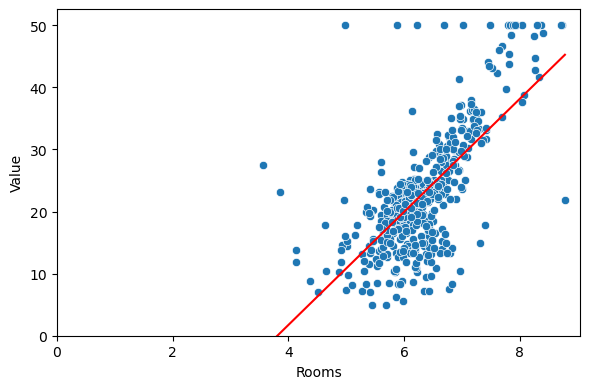

In [59]:
# dos librerías para poder graficar el gráfico de dispersión junto con la regresión lineal
import seaborn as sns
import matplotlib.pyplot as plt

# graficar los puntos (dispersión)
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=X['Rooms'], y=y)

# graficar la regresión lineal (linea de ajuste)
sns.lineplot(x=X['Rooms'], y=y_pred, color='red')

# axis
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regresion')
plt.show()